In [1]:
# loading libraries for data manipulation
import numpy as np
import pandas as pd

# loading libraries for data visualization
import matplotlib.pyplot as plt
from plotnine import *

# import tensorflow and keras packages
import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings('ignore')

We will load the MNIST data again.

In [2]:
# Load MNIST data from keras.datasets
(X_train_mnist, y_train_mnist), (X_test_mnist, y_test_mnist) = keras.datasets.mnist.load_data()

X_train_mnist = X_train_mnist.reshape(-1, 28*28).astype('float32') / 255.0
X_test_mnist = X_test_mnist.reshape(-1, 28*28).astype('float32') / 255.0

# Convert y labels to one-hot encoded vectors
y_train_mnist = keras.utils.to_categorical(y_train_mnist, num_classes=10)
y_test_mnist = keras.utils.to_categorical(y_test_mnist, num_classes=10)



Let's first build a deep neural network to classify digits without any regularization

In [3]:
model = keras.Sequential([
        keras.layers.Dense(256,activation='relu',input_shape=(784,)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(256,activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10,activation='softmax') # output layer
    ])

model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

model.fit(X_train_mnist,y_train_mnist,
                           epochs=5,verbose=1,batch_size=128,
                           validation_data=(X_test_mnist,y_test_mnist))

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9060 - loss: 0.3130 - val_accuracy: 0.9615 - val_loss: 0.1259
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9602 - loss: 0.1289 - val_accuracy: 0.9672 - val_loss: 0.1012
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9717 - loss: 0.0918 - val_accuracy: 0.9749 - val_loss: 0.0785
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9779 - loss: 0.0719 - val_accuracy: 0.9775 - val_loss: 0.0697
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9811 - loss: 0.0600 - val_accuracy: 0.9794 - val_loss: 0.0655


This is a feed forward fully connected neural network. That is, there is a forward pass and a backward pass but all nodes in one layer are connected to all nodes in the next layer. This mechanism is not able to capture any spatial properties in the input data. 

Now let's train a Convolutional Neural Network. 

First we will reload our input data but now in the form of images. We will keep the 28x28 shape of the inputs. Note that the 1 in 28x28x1 indicates the number of channels. Here it is one to indicate grayscale images. 

In [4]:
(X_train_mnist, y_train_mnist), (X_test_mnist, y_test_mnist) = keras.datasets.mnist.load_data()

X_train_mnist = X_train_mnist.reshape(-1, 28,28,1).astype('float32') / 255.0
X_test_mnist = X_test_mnist.reshape(-1, 28,28,1).astype('float32') / 255.0

# Convert y labels to one-hot encoded vectors
y_train_mnist = keras.utils.to_categorical(y_train_mnist, num_classes=10)
y_test_mnist = keras.utils.to_categorical(y_test_mnist, num_classes=10)

There are some new layers to get familiar with. 

- Conv2D - convolution layer with filter size, number of filters, stride, and padding
- max pooling layer with pool size and stride

In [ ]:
model = keras.Sequential([...])

model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

model.fit(X_train_mnist,y_train_mnist,
                           epochs=5,verbose=1,batch_size=128,
                           validation_data=(X_test_mnist,y_test_mnist))

The model summary will show that there are now stacks of filters being used in the convolution layers, which are then pooled together to further reduce, in the max pooling layers. Note that there are no additional parameters to learn from the pooling layers. 

In [ ]:
model.summary()

Let's modify the padding and stride values. 

- Larger stride values reduces spatial resolution: feature map shrinks faster
- Also speeds up training but the network might miss finer details

- padding = "same" retains spatial dimensions, helps detect objects touching the boundaries
- Also means you can stack more layers in the network without shrinking features maps too much

- padding = "valid" means no padding: reduces feature map dimensions
- Faster but loses edge information

In [ ]:
model = keras.Sequential([...])

model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

model.fit(X_train_mnist,y_train_mnist,
                           epochs=5,verbose=1,batch_size=128,
                           validation_data=(X_test_mnist,y_test_mnist))

In [ ]:
model.summary()

In [ ]:

# predict on test data to identify correct and incorrect classifications
y_pred_probs = model.predict(X_test_mnist)
y_pred = np.argmax(y_pred_probs, axis=1)  # predicted classes
y_true = np.argmax(y_test_mnist, axis=1)  # actual classes

# separate correct and incorrect predictions
correct_indices = np.where(y_pred == y_true)[0]
incorrect_indices = np.where(y_pred != y_true)[0]

# display up to 9 predictions in each case
def show_images(indices, title, n=9):
    plt.figure(figsize=(10, 4))
    for i, idx in enumerate(indices[:n]):
        plt.subplot(1, n, i + 1)
        plt.imshow(X_test_mnist[idx].reshape(28, 28), cmap='gray')
        plt.title(f"True: {y_true[idx]}\nPred: {y_pred[idx]}")
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

show_images(correct_indices, "Correct!")
show_images(incorrect_indices, "Incorrect!")


Data Augmentation can be added to increase the training size. 

We will use the CIFAR10 dataset for this example. This data set contains RGB images from 10 classes: 

'airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck'


In [7]:
# load CIFAR10 data directly from keras
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [9]:
# apply different types of augmentations
# an input image is augmented randomly (within thresholds) for each augmentation type
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip("horizontal"),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.2),
    keras.layers.RandomContrast(0.2)
])

This code shows an example of how augmentations are generated. Every time an image is passed through the network, it is augmented randomly. Ideally this means that the randomizations ensure that each version of the image the network sees is unique. 

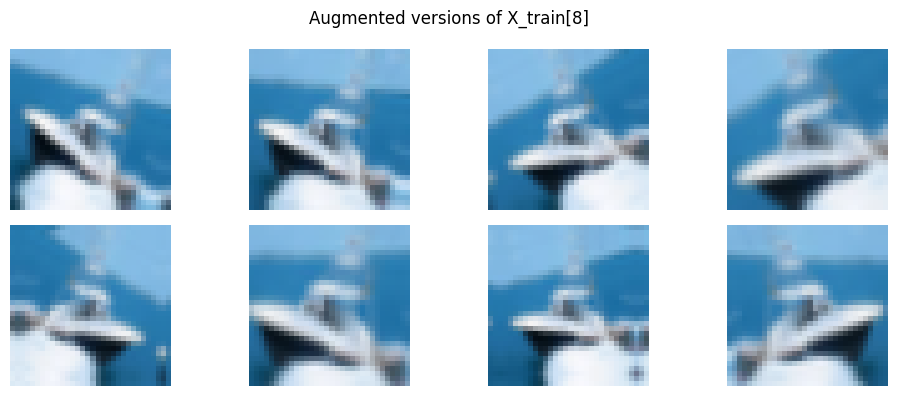

In [12]:
sample_img = tf.expand_dims(X_train[8], 0) # augmentation takes a batch of images so we use expand_dims to simulate a batch of 1 image

plt.figure(figsize=(10, 4))
for i in range(8):
    aug_img = data_augmentation(sample_img, training=True)
    plt.subplot(2, 4, i + 1)
    plt.imshow(aug_img[0])
    plt.axis('off')
plt.suptitle("Augmented versions of X_train[8]")
plt.tight_layout()
plt.show()

Let's incorporate data augmentation into our network. We will also use a functional way of creating network architectures. 

In [ ]:
# define input layer
inputs = keras.Input(shape=(32, 32, 3))

# data augmentation (only applied during training)

# conv block 1

# conv block 2

# conv block 3

# fully connected layers
...
outputs = keras.layers.Dense(10, activation='softmax')(x)


# create model object
model = keras.Model(inputs=inputs, outputs=outputs)

# compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# fit model
model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_test, y_test)
)


Let's use the model to predict an image's class

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

img = X_test[10]
img_batch = np.expand_dims(img, axis=0)  # shape: (1, 32, 32, 3)

pred = model.predict(img_batch)
pred_class = np.argmax(pred)

plt.imshow(img)
plt.title(f"Predicted: {class_names[pred_class]}")
plt.axis('off')
plt.show()

We can use the functional method of defining the architecture to extract activation maps. 

In [ ]:
# create model for intermediate activations
layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name]
activation_model = keras.models.Model(inputs=model.input, outputs=layer_outputs)

# get activations by "predicting" for each conv layer
activations = activation_model.predict(img_batch)


Function below is designed to generate the first 5 activation maps 

In [15]:
# pass predictions from each layer and layer names to generate heatmap 
def plot_feature_maps(activations, layer_names, image_index=0, max_channels=5):
    for layer_name, activation in zip(layer_names, activations):
        num_channels = activation.shape[-1]
        size = activation.shape[1]

        display_channels = min(max_channels, num_channels)
        fig, axes = plt.subplots(1, display_channels, figsize=(15, 5))
        fig.suptitle(f'Feature maps from layer: {layer_name}', fontsize=14)

        for i in range(display_channels):
            ax = axes[i]
            ax.matshow(activation[image_index, :, :, i], cmap='viridis') # heatmap generation
        plt.show()


In [ ]:
# get layer names
layer_names = [layer.name for layer in model.layers if 'conv' in layer.name]

# plot activation maps
plot_feature_maps(activations, layer_names) 

Let's use the same model and input image to generate the Grad-CAM. This Class Activation Map will produce a heatmap on the original image to highlight where the model is "looking" when making a prediction - the regions that had the most influence on the predicted class. 

To do so, 
- Take an image with a target class and make a prediction through the model.
- For the predicted class, compute the gradients of the class score with respect to the feature maps of the convolution layer.
- The gradients tell us which spatial locations are important.
- We use this information to weigh and combine feature maps to produce a heatmap. 
- The heatmap is the overlayed on the input image. 

In [ ]:
# we will also need the openCV library
import cv2

# step 1. make a prediction
preds = model.predict(img_batch)
pred_class = np.argmax(preds[0])
print(f"Predicted class: {pred_class}")

In [ ]:
# step 2. compute gradient of the class score with respect to the convolution layers
# here we will use the last convolution layer
last_conv_layer_name = [layer.name for layer in model.layers if 'conv' in layer.name][-1]
last_conv_layer = model.get_layer(last_conv_layer_name)

# create a model that outputs the last conv layer and predictions
# the weights of this layer are already fitted - no need to retrain
grad_model = tf.keras.models.Model(
    [model.inputs],
    [last_conv_layer.output, model.output]
)

# this tool tracks all computations needed to feed forward an input through the network
# so we can ask it later to calculate the gradient for us efficiently
with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(img_batch)
    loss = predictions[:, pred_class]

# calculate gradient
grads = tape.gradient(loss, conv_outputs)

# apply global average pooling over gradients
pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))


In [ ]:
# step 3. multiply each channel in the conv output by its gradient importance
conv_outputs = conv_outputs[0] # 1,h,w,c into h,w,c
heatmap = conv_outputs @ pooled_grads[..., tf.newaxis] # matrix multiplication
heatmap = tf.squeeze(heatmap) # h,w

# normalize heatmap to [0, 1]
heatmap = tf.maximum(heatmap, 0) / tf.reduce_max(heatmap)
heatmap = heatmap.numpy()

# resize heatmap to match input image
heatmap_resized = cv2.resize(heatmap, (32, 32))

# convert to RGB
image_rgb = np.uint8(255 * img)

# apply colormap
heatmap_color = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(image_rgb, 0.6, heatmap_color, 0.4, 0)


In [ ]:
# step 4. plot heatmap

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Grad-CAM Heatmap")
plt.imshow(heatmap_resized, cmap='jet')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Grad-CAM Overlay")
plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.tight_layout()
plt.show()